In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
! pip install phe

In [4]:
from phe import paillier

In [5]:
public_key, private_key = paillier.generate_paillier_keypair()
keyring = paillier.PaillierPrivateKeyring()
keyring.add(private_key)
public_key1, private_key1 = paillier.generate_paillier_keypair(keyring)
public_key2, private_key2 = paillier.generate_paillier_keypair(keyring)

In [6]:
bp = [80,81,82,83,84,85,96,87,98,69,80]
encrypted_bp = [public_key.encrypt(x) for x in bp]


In [8]:
for i in range(0,len(encrypted_bp)):
    print(encrypted_bp[i].ciphertext())
    print('\n')

3338724652005917972947524627587034017083645116271649278052016659963728414315213834174847334060316270200669705578436485455648912445547588962073788098566891465777377849651230477821996786356976882511290522283179439181950927904095569464022142460313828560389660127530364786067339446616574639257685519720459293805576297946358297164385761138589892246952387709111453583425221275992084834600268147580920933485449191996427623315751138774894402691868801592304116826567782098200946816167776418150571479102999126129009023201231750554032929133108268903787067529786649540350060900073243368321915402203326592566463370870997991685430629096872337926689234286732006504989187565412650146053104862024306867482082260542354962789827501638396406645068342714653972453241906400643009624002232935444362740771531734975041429343247843063957260495977627103214900460574833467331620019448785903057953468808825530376325172777561699397329016207215469322268009464279252264493357174947172151975493463832106400443456988889824358027227186

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [12]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [15]:
print(df.loc[10])
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [16]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


In [38]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

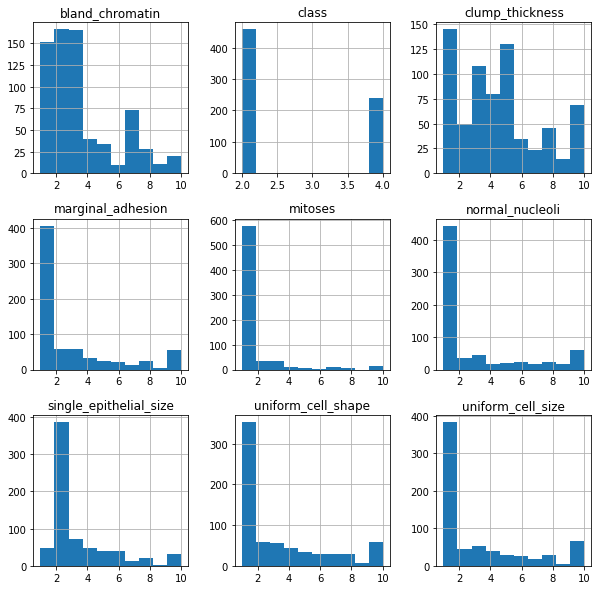

In [17]:
df.hist(figsize = (10, 10))
plt.show()

In [18]:
scatter_matrix(df, figsize = (18,18))
plt.show()

NameError: name 'scatter_matrix' is not defined

In [19]:
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [24]:
for col in df.columns:
    temp = "encrypted_" + col
    df[temp] = [public_key.encrypt(x) for x in df[col]]

KeyboardInterrupt: 

In [30]:
df.columns


Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'encrypted_clump_thickness', 'encypted_mitoses'],
      dtype='object')

In [33]:

df['encrypted_clump_thickness'] = [public_key.encrypt(x) for x in df['clump_thickness']]
df['encrypted_uniform_cell_size'] = [public_key.encrypt(x) for x in df['uniform_cell_size']]
df['encrypted_uniform_cell_shape'] = [public_key.encrypt(x) for x in df['uniform_cell_shape']]
df['encrypted_marginal_adhesion'] = [public_key.encrypt(x) for x in df['marginal_adhesion']]
df['encrypted_single_epithelial_size'] = [public_key.encrypt(int(x)) for x in df['single_epithelial_size']]
df['encrypted_bare_nuclei'] = [public_key.encrypt(x) for x in df['bare_nuclei']]
df['encrypted_bland_chromatin'] = [public_key.encrypt(x) for x in df['bland_chromatin']]
df['encrypted_normal_nucleoli'] = [public_key.encrypt(x) for x in df['normal_nucleoli']]
df['encrypted_mitoses'] = [public_key.encrypt(x) for x in df['mitoses']]
df['encrypted_class'] = [public_key.encrypt(x) for x in df['class']]
#df['encrypted_'] = [public_key.encrypt(x) for x in df['']]



TypeError: Don't know the precision of type <class 'str'>.

In [43]:
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'encrypted_clump_thickness', 'encypted_mitoses', 'encrypted_mitoses',
       'encrypted_uniform_cell_size', 'encrypted_uniform_cell_shape',
       'encrypted_marginal_adhesion', 'encrypted_single_epithelial_size'],
      dtype='object')

In [47]:
X = np.array(df[['encrypted_clump_thickness', 'encypted_mitoses', 'encrypted_mitoses',
       'encrypted_uniform_cell_size', 'encrypted_uniform_cell_shape',
       'encrypted_marginal_adhesion', 'encrypted_single_epithelial_size']])
y = np.array(df['class'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
type(df['bare_nuclei'][0])

str

In [62]:
df.bare_nuclei.head()

0     1
1    10
2     2
3     4
4     1
Name: bare_nuclei, dtype: object

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
seed = 8
scoring = 'accuracy'
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Rajiv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'EncryptedNumber'

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))

TypeError: float() argument must be a string or a number, not 'EncryptedNumber'

In [56]:
for x in df.encrypted_marginal_adhesion:
    print(x*5)
    print('\n')